In [29]:
#user-defined
import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py

#math
import numpy as np
import math
import scipy.fftpack
from scipy import signal
import scipy.interpolate

#gps
from geopy import distance

#plots
import pylab as plt
import matplotlib.pyplot as plt

### Tracker Camera

In [30]:
##source location[39.67650835454546, -119.82060767454543]

In [31]:
# camera_df = pandas.read_csv("~/data/Test_6_Bag/camera.csv")
# camera_df.rename(columns={'Unnamed: 0':'time'}, inplace=True)
# camera_df.columns.get_loc("/camera/odom/sample/pose/pose/orientation/w")
# new_df = camera_df.iloc[:, np.r_[0, 102:109, 145:150]]

In [32]:
##contains only Tracker Camera topics
camera_df=pd.read_hdf('~/data/2807/bag6/data6.h5')
camera_df.columns.get_loc("/camera/odom/sample/pose/pose/orientation/w")
new_df = camera_df.iloc[:, np.r_[0, 102:109, 145:150]]

In [33]:
start_time=new_df.loc[new_df.index[0], 'time']
start_time

1595957763.65

In [34]:
#camera_df
new_df.columns=new_df.columns.str.replace(r"/","_")
value = new_df.time.loc[0]
new_df.time=(new_df.time-start_time)
new_df


/home/flybot/anaconda3/envs/FlyDataAnalysis/lib/python3.6/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,time,_camera_odom_sample_pose_pose_orientation_w,_camera_odom_sample_pose_pose_orientation_x,_camera_odom_sample_pose_pose_orientation_y,_camera_odom_sample_pose_pose_orientation_z,_camera_odom_sample_pose_pose_position_x,_camera_odom_sample_pose_pose_position_y,_camera_odom_sample_pose_pose_position_z,_camera_odom_sample_twist_twist_angular_x,_camera_odom_sample_twist_twist_angular_y,_camera_odom_sample_twist_twist_angular_z,_camera_odom_sample_twist_twist_linear_x,_camera_odom_sample_twist_twist_linear_y
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.573671,-0.029521,-0.028755,-0.818049,-0.076626,0.112978,0.004285,0.004059,0.000987,-0.001743,-0.016901,0.010181
4,0.01,0.573692,-0.029512,-0.028749,-0.818034,-0.076969,0.112727,0.004380,0.005182,0.002013,0.001496,-0.011201,0.006384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320129,799.51,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096
320130,799.51,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096
320131,799.52,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096
320132,799.52,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096


Text(0.5, 0, 'Time, sec')

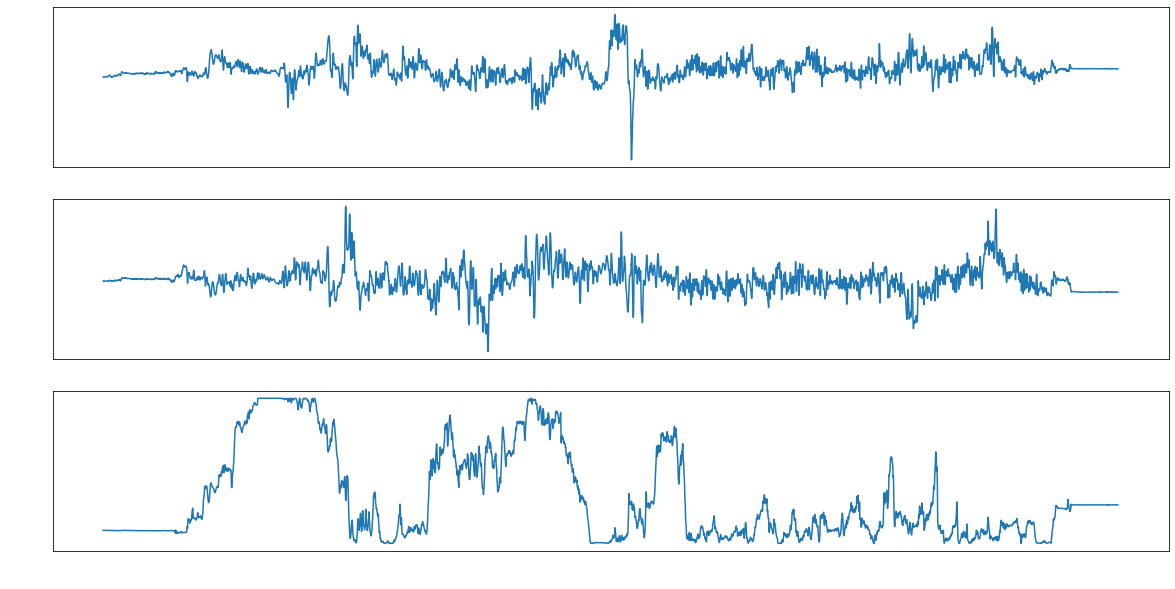

In [35]:
##plot pose from camera
fig_cam = plt.figure(figsize=(20,10))

ax1 = fig_cam.add_subplot(311)
ax1.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_x)
ax1.set_ylabel('pose orientation x')
hp.plot_color(ax1)

ax2 = fig_cam.add_subplot(312)
ax2.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_y)
ax2.set_ylabel('pose orientation y')
hp.plot_color(ax2)

ax3 = fig_cam.add_subplot(313)
ax3.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_z)
ax3.set_ylabel('pose orientationz')
hp.plot_color(ax3)

ax3.set_xlabel('Time, sec')

### Orientation from Tracker

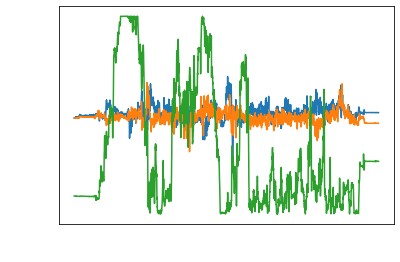

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_x)
ax.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_y)
ax.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_z)
ax.set_ylabel('Pose Orientation (x,y,z)')
ax.set_xlabel('Time, sec')
hp.plot_color(ax)

### Pose from Tracker

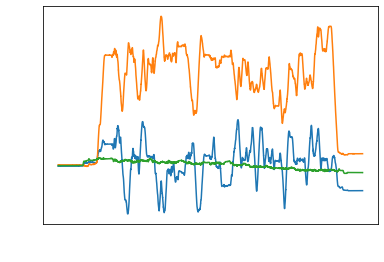

In [37]:
fig_pose = plt.figure()
ax_pose = fig_pose.add_subplot(111)
ax_pose.plot(new_df.time, new_df._camera_odom_sample_pose_pose_position_x)
ax_pose.plot(new_df.time, new_df._camera_odom_sample_pose_pose_position_y)
ax_pose.plot(new_df.time, new_df._camera_odom_sample_pose_pose_position_z)
ax_pose.set_ylabel('Position (x,y,z)')
ax_pose.set_xlabel('Time, sec')
hp.plot_color(ax_pose)


In [38]:
# df_bag6 = hp.import_bag("~/data/2807/bag6/bag6.csv")
# interpolate_data=df_bag6.interpolate()
# interpolate_data.to_hdf('~/data/2807/bag6/data6complete.h5', key='df_bag6', mode='w')

In [39]:
#processed bag
bag6=pd.read_hdf('~/data/2807/bag6/data6complete.h5')
start=bag6.loc[bag6.index[0], 'time']
bag6.time=(bag6.time-start_time)
bag6

,time,_analog_output_data,_imu_data_angular_velocity_x,_imu_data_angular_velocity_y,_imu_data_angular_velocity_z,_imu_data_angular_velocity_covariance_0,_imu_data_angular_velocity_covariance_1,_imu_data_angular_velocity_covariance_2,_imu_data_angular_velocity_covariance_3,_imu_data_angular_velocity_covariance_4,...,_ublox_gps_fix_velocity_twist_covariance_6,_ublox_gps_fix_velocity_twist_covariance_7,_ublox_gps_fix_velocity_twist_covariance_8,_ublox_gps_fix_velocity_twist_covariance_9,_ublox_gps_fix_velocity_twist_twist_angular_x,_ublox_gps_fix_velocity_twist_twist_angular_y,_ublox_gps_fix_velocity_twist_twist_angular_z,_ublox_gps_fix_velocity_twist_twist_linear_x,_ublox_gps_fix_velocity_twist_twist_linear_y,_ublox_gps_fix_velocity_twist_twist_linear_z
0,0.00,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,0.171183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399251,799.52,0.132081,0.001968,-0.001410,0.003282,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399252,799.52,0.131768,0.002590,-0.001250,0.004460,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399253,799.53,0.131977,0.003213,-0.001091,0.005639,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399254,799.53,0.132185,0.003835,-0.000932,0.006817,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035


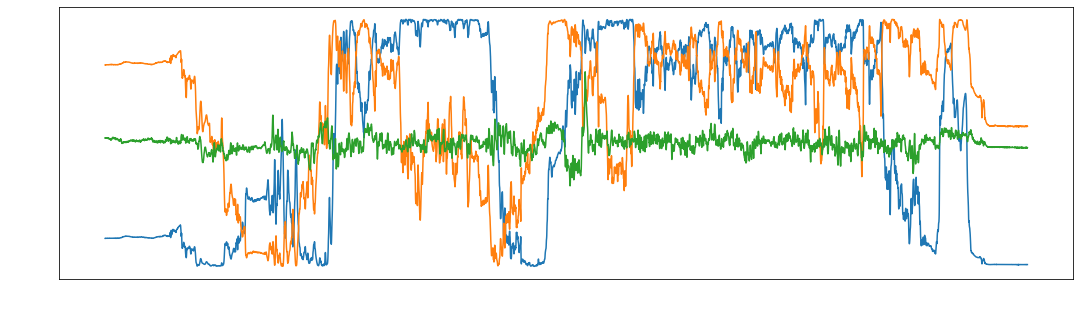

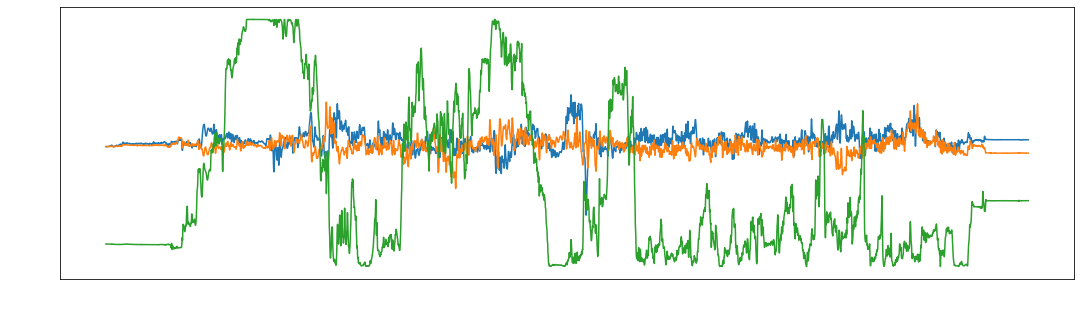

In [40]:
#imu orientation vs camera orientation

fig_pose_imu = plt.figure(figsize=(40,5))
ax_pose_imu = fig_pose_imu.add_subplot(1,2,1)
ax_pose_imu.plot(bag6.time, bag6._imu_data_orientation_x)
ax_pose_imu.plot(bag6.time, bag6._imu_data_orientation_y)
ax_pose_imu.plot(bag6.time, bag6._imu_data_orientation_z)
ax_pose_imu.set_ylabel('Orientation Imu (x,y,z)')
ax_pose_imu.set_xlabel('Time, sec')
hp.plot_color(ax_pose_imu)

fig_pose_imu = plt.figure(figsize=(40,5))
ax_pose_tracker = fig_pose_imu.add_subplot(1,2,2)
ax_pose_tracker.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_x)#blue
ax_pose_tracker.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_y)#orange
ax_pose_tracker.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_z)#green
ax_pose_tracker.set_ylabel('Orientation_Tracker (x,y,z)')
ax_pose_tracker.set_xlabel('Time, sec')
hp.plot_color(ax_pose_tracker)

#need to check with the tf being set 

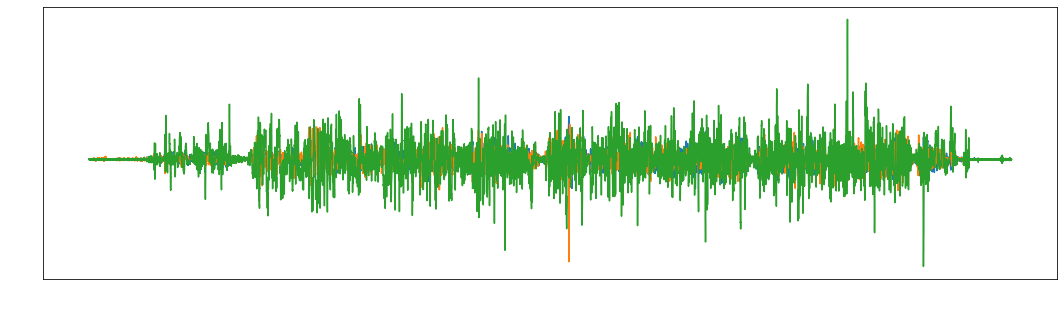

In [41]:
#twist angular

fig_pose_imu1 = plt.figure(figsize=(40,5))
ax_pose_tracker1 = fig_pose_imu1.add_subplot(1,2,2)
ax_pose_tracker1.plot(new_df.time, new_df._camera_odom_sample_twist_twist_angular_x)#blue
ax_pose_tracker1.plot(new_df.time, new_df._camera_odom_sample_twist_twist_angular_y)#orange
ax_pose_tracker1.plot(new_df.time, new_df._camera_odom_sample_twist_twist_angular_z)#green
ax_pose_tracker1.set_ylabel('Twist Angular (x,y,z)')
ax_pose_tracker1.set_xlabel('Time, sec')
hp.plot_color(ax_pose_tracker1)

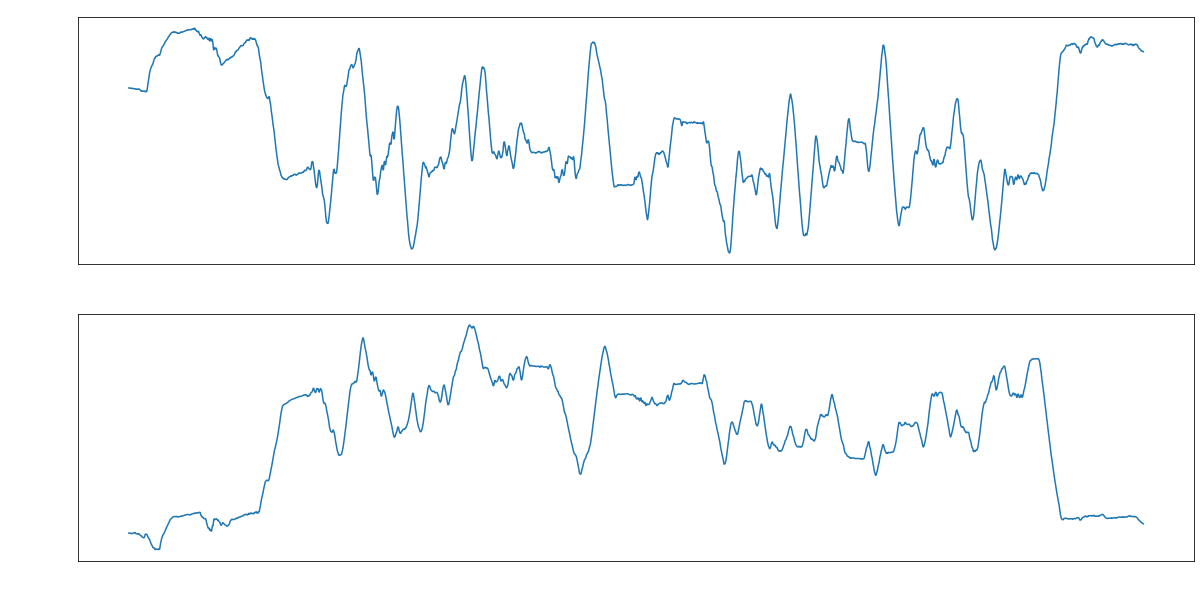

In [42]:
#just to get an idea of the lat and long positions - move on

fig_find_position = plt.figure(figsize=(20,10))

ax = fig_find_position.add_subplot(211)
ax.plot(bag6.time,bag6._ublox_gps_fix_latitude)
ax.set_xlabel('Time, sec')
ax.set_ylabel('Latitude')

ax1 = fig_find_position.add_subplot(212)
ax1.plot(bag6.time,bag6._ublox_gps_fix_longitude)
ax1.set_xlabel('Time, sec')
ax1.set_ylabel('Longitude')

hp.plot_color(ax)
hp.plot_color(ax1)

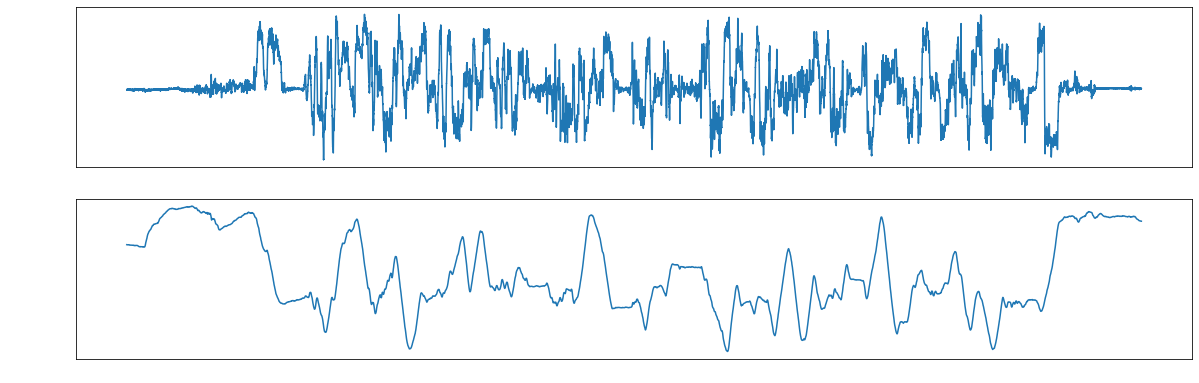

In [43]:
##camera vs gps (can we related latitude with x direction movements?)
fig_imu = plt.figure(figsize=(20,10))

ax1 = fig_imu.add_subplot(311)
ax1.plot(new_df.time, new_df._camera_odom_sample_twist_twist_linear_x)
ax1.set_ylabel('pose orientation x')
hp.plot_color(ax1)

ax2 = fig_imu.add_subplot(312)
ax2.plot(bag6.time, bag6._ublox_gps_fix_latitude)
ax2.set_ylabel('Latitude')
hp.plot_color(ax2)

# ax3 = fig_imu.add_subplot(313)
# ax3.plot(bag6.time, bag6._imu_data_orientation_x)
# ax3.set_ylabel('Imu Orientation X')
# hp.plot_color(ax3)

# ax3.set_xlabel('Time, sec')

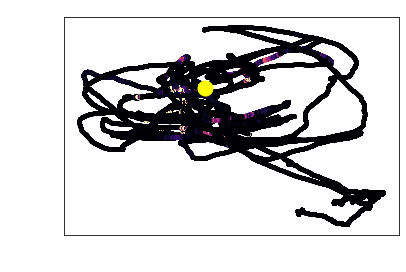

In [44]:
#odor concentration vs lat long position

fig_odor_instance = plt.figure()
ax_odor_instance = fig_odor_instance.add_subplot(111)
ax_odor_instance.scatter(bag6._ublox_gps_fix_latitude, bag6._ublox_gps_fix_longitude, c=bag6._analog_output_data, s=10, cmap='magma')
plt.plot([39.67650835454546], [-119.82060767454543], marker='o', markersize=15, color="yellow")
hp.plot_color(ax_odor_instance)

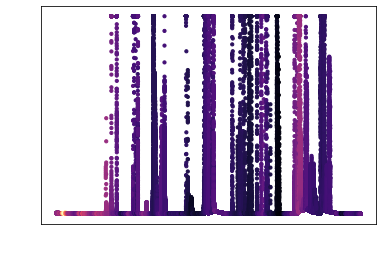

In [45]:
#odor concentration vs time

fig_odor_conc = plt.figure()
ax_odor_conc = fig_odor_conc.add_subplot(111)
ax_odor_conc.scatter(bag6.time, bag6._analog_output_data, c=bag6._ublox_gps_fix_altitude, s=10, cmap='magma')
ax_odor_conc.set_xlabel('Time')
ax_odor_conc.set_ylabel('Odor')
hp.plot_color(ax_odor_conc)

In [46]:
# filter by odor concentration (voltage)

query = '_analog_output_data > 5 and _analog_output_data <= 10'
df_tmp = bag6.query(query)
df_tmp

,time,_analog_output_data,_imu_data_angular_velocity_x,_imu_data_angular_velocity_y,_imu_data_angular_velocity_z,_imu_data_angular_velocity_covariance_0,_imu_data_angular_velocity_covariance_1,_imu_data_angular_velocity_covariance_2,_imu_data_angular_velocity_covariance_3,_imu_data_angular_velocity_covariance_4,...,_ublox_gps_fix_velocity_twist_covariance_6,_ublox_gps_fix_velocity_twist_covariance_7,_ublox_gps_fix_velocity_twist_covariance_8,_ublox_gps_fix_velocity_twist_covariance_9,_ublox_gps_fix_velocity_twist_twist_angular_x,_ublox_gps_fix_velocity_twist_twist_angular_y,_ublox_gps_fix_velocity_twist_twist_angular_z,_ublox_gps_fix_velocity_twist_twist_linear_x,_ublox_gps_fix_velocity_twist_twist_linear_y,_ublox_gps_fix_velocity_twist_twist_linear_z
65748,131.70,5.048959,-0.056868,0.003680,-0.084337,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.107616,0.0,0.0,0.0,0.0,0.0,-0.053000,-0.083667,-0.027333
72470,145.15,5.176902,0.715211,-0.036504,0.352328,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.101839,0.0,0.0,0.0,0.0,0.0,0.553051,-0.083202,-0.200101
72471,145.15,6.454843,0.715498,-0.037333,0.356820,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.101897,0.0,0.0,0.0,0.0,0.0,0.555212,-0.084848,-0.200424
72472,145.15,7.732784,0.718924,-0.037626,0.356829,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.101955,0.0,0.0,0.0,0.0,0.0,0.557374,-0.086495,-0.200747
72473,145.15,9.010725,0.722349,-0.037920,0.356837,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.102013,0.0,0.0,0.0,0.0,0.0,0.559535,-0.088141,-0.201071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359542,720.02,6.530362,-0.425347,0.252118,0.371444,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.032696,0.0,0.0,0.0,0.0,0.0,-1.048500,-0.368904,-0.005577
359543,720.02,7.459224,-0.419432,0.257106,0.373100,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.032604,0.0,0.0,0.0,0.0,0.0,-1.047000,-0.369577,-0.005538
359544,720.02,7.126854,-0.413518,0.262095,0.374756,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.032513,0.0,0.0,0.0,0.0,0.0,-1.045500,-0.370250,-0.005500
359545,720.02,6.794485,-0.411026,0.261634,0.373610,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.032422,0.0,0.0,0.0,0.0,0.0,-1.044000,-0.370923,-0.005462


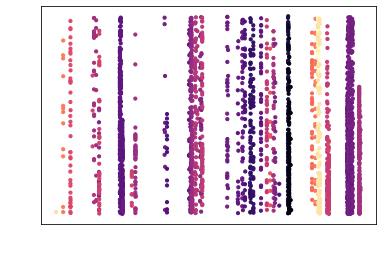

In [47]:
#concentration with time

fig_odor_conc = plt.figure()
ax_odor_conc_filtered = fig_odor_conc.add_subplot(111)
ax_odor_conc_filtered.scatter(df_tmp.time, df_tmp._analog_output_data, c=df_tmp._ublox_gps_fix_altitude, s=10, cmap='magma')
ax_odor_conc_filtered.set_xlabel('Time')
ax_odor_conc_filtered.set_ylabel('Odor')
hp.plot_color(ax_odor_conc_filtered)
#zoom into time here

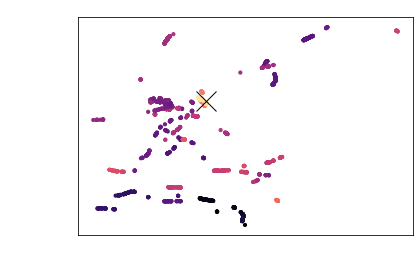

In [48]:
#concentration locations

fig_odor_gps = plt.figure()
ax_odor_gps_filtered = fig_odor_gps.add_subplot(111)
ax_odor_gps_filtered.scatter(df_tmp._ublox_gps_fix_latitude, df_tmp._ublox_gps_fix_longitude, c=df_tmp._ublox_gps_fix_altitude, s=10, cmap='magma')
ax_odor_gps_filtered.set_xlabel('Latitude')
ax_odor_gps_filtered.set_ylabel('Longitude')
plt.plot([39.67650835454546], [-119.82060767454543], marker='x', markersize=20, color="black")
hp.plot_color(ax_odor_gps_filtered)

Text(0.5, 17.200000000000003, 'Time, sec')

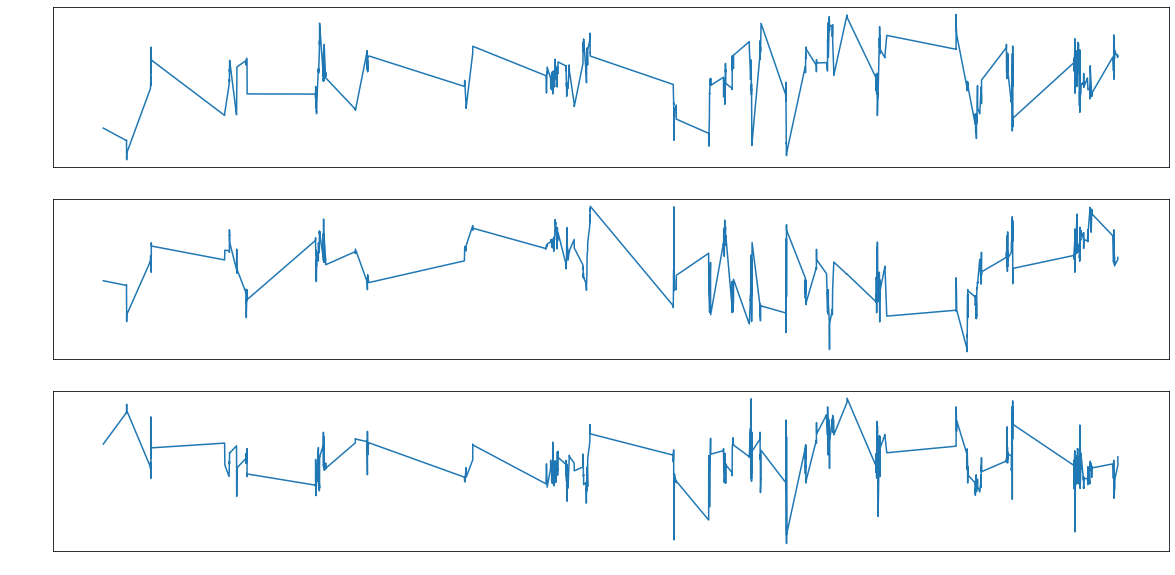

In [49]:
#windspeed where the concentration is higher -- need to have a more realistic view of this

fig_windspeed = plt.figure(figsize=(20,10))

ax1_windspeed = fig_windspeed.add_subplot(311)
ax1_windspeed.plot(df_tmp.time, df_tmp._trisonica_northsouth)
ax1_windspeed.set_ylabel('northsouth')

ax2_windspeed = fig_windspeed.add_subplot(312)
ax2_windspeed.plot(df_tmp.time, df_tmp._trisonica_westeast)
ax2_windspeed.set_ylabel('westeast')

ax3_windspeed = fig_windspeed.add_subplot(313)
ax3_windspeed.plot(df_tmp.time, df_tmp._trisonica_updown)
ax3_windspeed.set_ylabel('updown')

hp.plot_color(ax1_windspeed)
hp.plot_color(ax2_windspeed)
hp.plot_color(ax3_windspeed)
ax3.set_xlabel('Time, sec')

In [50]:
df_pos = pd.DataFrame()
df_pos['time'] = df_tmp['time']
df_pos['distance']=hp.haversine_distance(df_tmp._ublox_gps_fix_latitude.astype(float),df_tmp._ublox_gps_fix_longitude.astype(float), 39.67650835454546,-119.82060767454543)
df_pos['odor_concentration'] = df_tmp['_analog_output_data']

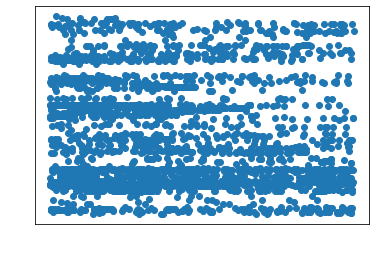

In [56]:
#distance plot where odor was encountered
fig_distance = plt.figure()
ax_distance = fig_distance.add_subplot(111)
ax_distance.scatter(df_pos["odor_concentration"], df_pos["distance"])
ax_distance.set_xlabel('Odor')
ax_distance.set_ylabel('Distance')
hp.plot_color(ax_distance)

## time encounters will have a specific pattern with increasing distance
## wind velocity , time, distance

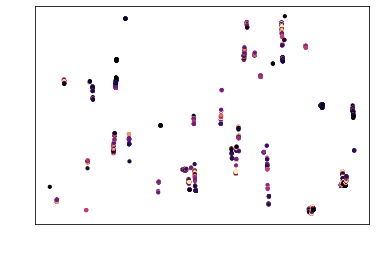

In [52]:
#odor encounters

fig_dist_odor = plt.figure()
ax_dist_odor = fig_dist_odor.add_subplot(111)
ax_dist_odor.scatter(df_pos["time"], df_pos["distance"], c=df_pos['odor_concentration'], s=10, cmap='magma')
ax_dist_odor.set_xlabel('Time, seconds')
ax_dist_odor.set_ylabel('Distance, meters')
#plt.plot([39.67650835454546], [-119.82060767454543], marker='x', markersize=20, color="black")
hp.plot_color(ax_dist_odor)